In [2]:
# -*- coding:utf-8 -*-
# !/usr/bin/env python
"""
Date: 2023/1/28 10:20
Desc: 东方财富-股票-财务分析
"""
import pandas as pd
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

from functools import lru_cache


@lru_cache()
def _stock_balance_sheet_by_report_ctype_em(symbol: str = "SH600519") -> str:
    """
    东方财富-股票-财务分析-资产负债表-按报告期-公司类型判断
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh601878#zcfzb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 东方财富-股票-财务分析-资产负债表-按报告期-公司类型判断
    :rtype: str
    """
    url = f"https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index"
    params = {"type": "web", "code": symbol.lower()}
    r = requests.get(url, params=params)
    soup = BeautifulSoup(r.text, "lxml")
    company_type = soup.find(attrs={"id": "hidctype"})["value"]
    return company_type


def stock_balance_sheet_by_report_em(symbol: str = "SH600519") -> pd.DataFrame:
    """
    东方财富-股票-财务分析-资产负债表-按报告期
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 资产负债表-按报告期
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/zcfzbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "0",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/zcfzbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "0",
            "reportType": "1",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_balance_sheet_by_yearly_em(symbol: str = "SH600036") -> pd.DataFrame:
    """
    东方财富-股票-财务分析-资产负债表-按年度
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 资产负债表-按年度
    :rtype: pandas.DataFrame
    """
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/zcfzbDateAjaxNew"
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol)
    params = {
        "companyType": company_type,
        "reportDateType": "1",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    try:
        temp_df = pd.DataFrame(data_json["data"])
    except:
        company_type = 3
        params.update({"companyType": company_type})
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/zcfzbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "1",
            "reportType": "1",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_profit_sheet_by_report_em(symbol: str = "SH600519") -> pd.DataFrame:
    """
    东方财富-股票-财务分析-利润表-报告期
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 利润表-报告期
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/lrbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "0",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/lrbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "0",
            "reportType": "1",
            "code": symbol,
            "dates": item,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_profit_sheet_by_yearly_em(symbol: str = "SH600519") -> pd.DataFrame:
    """
    东方财富-股票-财务分析-利润表-按年度
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 利润表-按年度
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/lrbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "1",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/lrbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "1",
            "reportType": "1",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_profit_sheet_by_quarterly_em(
    symbol: str = "SH600519",
) -> pd.DataFrame:
    """
    东方财富-股票-财务分析-利润表-按单季度
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 利润表-按单季度
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/lrbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "2",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/lrbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "0",
            "reportType": "2",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_cash_flow_sheet_by_report_em(
    symbol: str = "SH600519",
) -> pd.DataFrame:
    """
    东方财富-股票-财务分析-现金流量表-按报告期
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 现金流量表-按报告期
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/xjllbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "0",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/xjllbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "0",
            "reportType": "1",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_cash_flow_sheet_by_yearly_em(
    symbol: str = "SH600519",
) -> pd.DataFrame:
    """
    东方财富-股票-财务分析-现金流量表-按年度
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 现金流量表-按年度
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/xjllbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "1",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/xjllbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "1",
            "reportType": "1",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df


def stock_cash_flow_sheet_by_quarterly_em(
    symbol: str = "SH600519",
) -> pd.DataFrame:
    """
    东方财富-股票-财务分析-现金流量表-按单季度
    https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/Index?type=web&code=sh600519#lrb-0
    :param symbol: 股票代码; 带市场标识
    :type symbol: str
    :return: 现金流量表-按单季度
    :rtype: pandas.DataFrame
    """
    company_type = _stock_balance_sheet_by_report_ctype_em(symbol=symbol)
    url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/xjllbDateAjaxNew"
    params = {
        "companyType": company_type,
        "reportDateType": "2",
        "code": symbol,
    }
    r = requests.get(url, params=params)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_df["REPORT_DATE"] = pd.to_datetime(temp_df["REPORT_DATE"]).dt.date
    temp_df["REPORT_DATE"] = temp_df["REPORT_DATE"].astype(str)
    need_date = temp_df["REPORT_DATE"].tolist()
    sep_list = [
        ",".join(need_date[i : i + 5]) for i in range(0, len(need_date), 5)
    ]
    big_df = pd.DataFrame()
    for item in tqdm(sep_list, leave=False):
        url = "https://emweb.securities.eastmoney.com/PC_HSF10/NewFinanceAnalysis/xjllbAjaxNew"
        params = {
            "companyType": company_type,
            "reportDateType": "0",
            "reportType": "2",
            "dates": item,
            "code": symbol,
        }
        r = requests.get(url, params=params)
        data_json = r.json()
        temp_df = pd.DataFrame(data_json["data"])
        big_df = pd.concat([big_df, temp_df], ignore_index=True)
    return big_df




In [4]:

def stock_financial_analysis_indicator(symbol: str = "600004") -> pd.DataFrame:
    """
    新浪财经-财务分析-财务指标
    https://money.finance.sina.com.cn/corp/go.php/vFD_FinancialGuideLine/stockid/600004/ctrl/2019/displaytype/4.phtml
    :param symbol: 股票代码
    :type symbol: str
    :return: 新浪财经-财务分析-财务指标
    :rtype: pandas.DataFrame
    """
    url = f"https://money.finance.sina.com.cn/corp/go.php/vFD_FinancialGuideLine/stockid/{symbol}/ctrl/2020/displaytype/4.phtml"
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "lxml")
    year_context = soup.find(attrs={"id": "con02-1"}).find("table").find_all("a")
    year_list = [item.text for item in year_context]
    out_df = pd.DataFrame()
    for year_item in tqdm(year_list, leave=False):
        url = f"https://money.finance.sina.com.cn/corp/go.php/vFD_FinancialGuideLine/stockid/{symbol}/ctrl/{year_item}/displaytype/4.phtml"
        r = requests.get(url)
        temp_df = pd.read_html(r.text)[12].iloc[:, :-1]
        temp_df.columns = temp_df.iloc[0, :]
        temp_df = temp_df.iloc[1:, :]
        big_df = pd.DataFrame()
        indicator_list = ["每股指标", "盈利能力", "成长能力", "营运能力", "偿债及资本结构", "现金流量", "其他指标"]
        for i in range(len(indicator_list)):
            if i == 6:
                inner_df = temp_df[
                    temp_df.loc[
                        temp_df.iloc[:, 0].str.find(indicator_list[i]) == 0, :
                    ].index[0] :
                ].T
            else:
                inner_df = temp_df[
                    temp_df.loc[temp_df.iloc[:, 0].str.find(indicator_list[i]) == 0, :]
                    .index[0] : temp_df.loc[
                        temp_df.iloc[:, 0].str.find(indicator_list[i + 1]) == 0, :
                    ]
                    .index[0]
                    - 1
                ].T
            inner_df = inner_df.reset_index(drop=True)
            big_df = pd.concat([big_df, inner_df], axis=1)
        big_df.columns = big_df.iloc[0, :].tolist()
        big_df = big_df.iloc[1:, :]
        big_df.index = temp_df.columns.tolist()[1:]
        out_df = pd.concat([out_df, big_df])

    out_df.dropna(inplace=True)
    out_df.reset_index(inplace=True)
    out_df.rename(columns={"index": "日期"}, inplace=True)
    return out_df


In [85]:
balance_sheet = stock_balance_sheet_by_yearly_em("SZ002475")
profit_sheet = stock_profit_sheet_by_yearly_em("SZ002475")
cash_flow_sheet = stock_cash_flow_sheet_by_yearly_em("SZ002475")

# 转换数据单位为亿元
profit_sheet[['TOTAL_OPERATE_INCOME','PARENT_NETPROFIT','FINANCE_EXPENSE', 'SALE_EXPENSE', 'MANAGE_EXPENSE', 'RESEARCH_EXPENSE']] /= 1e8

In [86]:
for i in profit_sheet.columns:
    print(i)

SECUCODE
SECURITY_CODE
SECURITY_NAME_ABBR
ORG_CODE
ORG_TYPE
REPORT_DATE
REPORT_TYPE
REPORT_DATE_NAME
SECURITY_TYPE_CODE
NOTICE_DATE
UPDATE_DATE
CURRENCY
TOTAL_OPERATE_INCOME
TOTAL_OPERATE_INCOME_YOY
OPERATE_INCOME
OPERATE_INCOME_YOY
INTEREST_INCOME
INTEREST_INCOME_YOY
EARNED_PREMIUM
EARNED_PREMIUM_YOY
FEE_COMMISSION_INCOME
FEE_COMMISSION_INCOME_YOY
OTHER_BUSINESS_INCOME
OTHER_BUSINESS_INCOME_YOY
TOI_OTHER
TOI_OTHER_YOY
TOTAL_OPERATE_COST
TOTAL_OPERATE_COST_YOY
OPERATE_COST
OPERATE_COST_YOY
INTEREST_EXPENSE
INTEREST_EXPENSE_YOY
FEE_COMMISSION_EXPENSE
FEE_COMMISSION_EXPENSE_YOY
RESEARCH_EXPENSE
RESEARCH_EXPENSE_YOY
SURRENDER_VALUE
SURRENDER_VALUE_YOY
NET_COMPENSATE_EXPENSE
NET_COMPENSATE_EXPENSE_YOY
NET_CONTRACT_RESERVE
NET_CONTRACT_RESERVE_YOY
POLICY_BONUS_EXPENSE
POLICY_BONUS_EXPENSE_YOY
REINSURE_EXPENSE
REINSURE_EXPENSE_YOY
OTHER_BUSINESS_COST
OTHER_BUSINESS_COST_YOY
OPERATE_TAX_ADD
OPERATE_TAX_ADD_YOY
SALE_EXPENSE
SALE_EXPENSE_YOY
MANAGE_EXPENSE
MANAGE_EXPENSE_YOY
ME_RESEARCH_EXPENSE

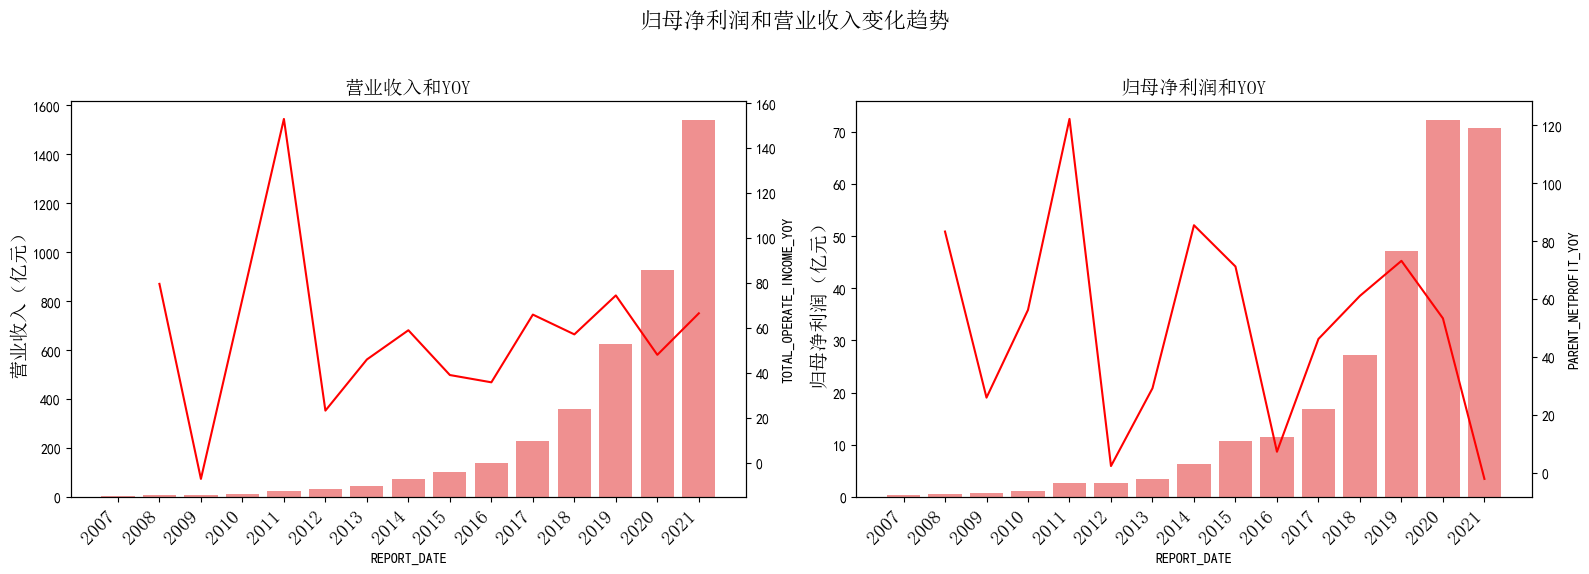

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置中文显示
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)

# 只保留 REPORT_DATE 的年份信息
profit_sheet['REPORT_DATE'] = profit_sheet['REPORT_DATE'].str[:4]

# 分组计算每年的营业收入和归属母公司净利润及其同比增长率
df = profit_sheet.groupby('REPORT_DATE').agg(
    {'TOTAL_OPERATE_INCOME': 'sum',
     'PARENT_NETPROFIT': 'sum',
     'TOTAL_OPERATE_INCOME_YOY': 'mean',
     'PARENT_NETPROFIT_YOY': 'mean'}
).reset_index()

# 设置画布
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 营业收入和YOY
sns.barplot(data=df, x='REPORT_DATE', y='TOTAL_OPERATE_INCOME', color=color1, ax=axes[0])
axes[0].set_ylabel('营业收入（亿元）', color='black', fontproperties=font)
axes[0].tick_params(axis='y', labelcolor='black')
axes[0].set_xticklabels(df['REPORT_DATE'].unique(), rotation=45, ha='right', fontproperties=font)
sns.lineplot(data=df, x='REPORT_DATE', y='TOTAL_OPERATE_INCOME_YOY', color=color2, ax=axes[0].twinx())
axes[0].set_title('营业收入和YOY', fontproperties=font)

# 归母净利润和YOY
sns.barplot(data=df, x='REPORT_DATE', y='PARENT_NETPROFIT', color=color1, ax=axes[1])
axes[1].set_ylabel('归母净利润（亿元）', color='black', fontproperties=font)
axes[1].tick_params(axis='y', labelcolor='black')
axes[1].set_xticklabels(df['REPORT_DATE'].unique(), rotation=45, ha='right', fontproperties=font)
sns.lineplot(data=df, x='REPORT_DATE', y='PARENT_NETPROFIT_YOY', color=color2, ax=axes[1].twinx())
axes[1].set_title('归母净利润和YOY', fontproperties=font)

# 设置整体标题
fig.suptitle('归母净利润和营业收入变化趋势', fontproperties=font, fontsize=16)

# 调整图例位置
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# 显示图形
plt.show()



In [88]:
profit_sheet['FINANCE_EXPENSE']

0     5.546659
1     9.048281
2     3.300734
3     3.017898
4     2.032090
5     0.362312
6    -0.362359
7     0.516879
8     0.625324
9     0.101330
10    0.134207
11   -0.000735
12    0.001723
13   -0.015117
14    0.010917
Name: FINANCE_EXPENSE, dtype: float64

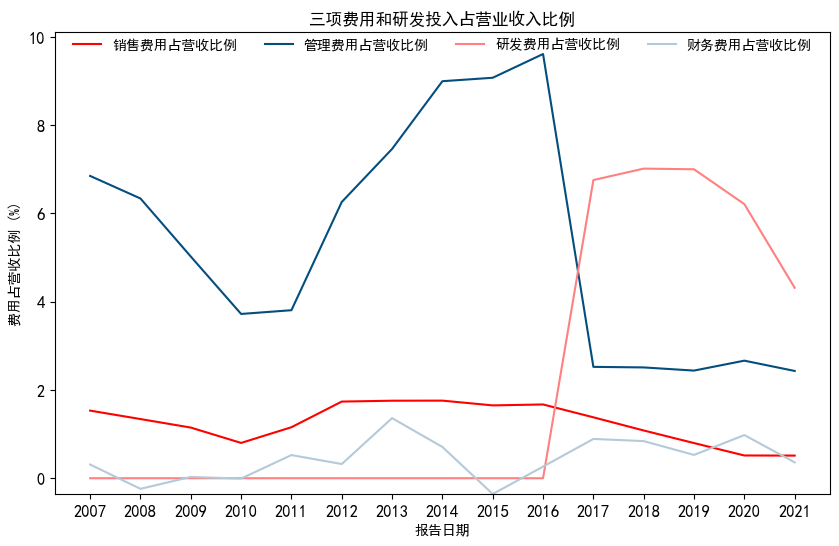

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 只保留 REPORT_DATE 的年份信息
profit_sheet['REPORT_DATE'] = profit_sheet['REPORT_DATE'].str[:4]

# 计算三项费用及研发投入占营业收入的比例
df = profit_sheet.groupby('REPORT_DATE').agg(
    {'TOTAL_OPERATE_INCOME': 'sum',
     'SALE_EXPENSE': 'sum',
     'MANAGE_EXPENSE': 'sum',
     'FINANCE_EXPENSE': 'sum',
     'RESEARCH_EXPENSE': 'sum'}
).reset_index()

df['SALE_EXPENSE_RATIO'] = df['SALE_EXPENSE'] / df['TOTAL_OPERATE_INCOME'] * 100
df['MANAGE_EXPENSE_RATIO'] = df['MANAGE_EXPENSE'] / df['TOTAL_OPERATE_INCOME'] * 100
df['FINANCE_EXPENSE_RATIO'] = df['FINANCE_EXPENSE'] / df['TOTAL_OPERATE_INCOME'] * 100
df['RESEARCH_EXPENSE_RATIO'] = df['RESEARCH_EXPENSE'] / df['TOTAL_OPERATE_INCOME'] * 100

# 计算最大值和最小值，以及增量
max_ratio = df[['SALE_EXPENSE_RATIO', 'MANAGE_EXPENSE_RATIO', 'FINANCE_EXPENSE_RATIO', 'RESEARCH_EXPENSE_RATIO']].max().max()
min_ratio = df[['SALE_EXPENSE_RATIO', 'MANAGE_EXPENSE_RATIO', 'FINANCE_EXPENSE_RATIO', 'RESEARCH_EXPENSE_RATIO']].min().min()
increment = (max_ratio - min_ratio) * 0.05

# 画图
fig, ax = plt.subplots(figsize=(10, 6))

# 折线图
sns.lineplot(data=df, x='REPORT_DATE', y='SALE_EXPENSE_RATIO', color=(255/255,0/255,0/255), label='销售费用占营收比例')
sns.lineplot(data=df, x='REPORT_DATE', y='MANAGE_EXPENSE_RATIO', color=(4/255,78/255,126/255), label='管理费用占营收比例')
sns.lineplot(data=df, x='REPORT_DATE', y='RESEARCH_EXPENSE_RATIO', color=(255/255,128/255,128/255), label='研发费用占营收比例')
sns.lineplot(data=df, x='REPORT_DATE', y='FINANCE_EXPENSE_RATIO', color=(180/255,202/255,216/255), label='财务费用占营收比例')

# 设置y轴范围
ax.set_ylim([min_ratio, max_ratio + increment])

# 设置坐标轴标签和标题
ax.set_xlabel('报告日期')
ax.set_ylabel('费用占营收比例 (%)')
ax.set_title('三项费用和研发投入占营业收入比例')

# 设置坐标轴刻度的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 调整图例位置
plt.legend(loc='upper center',  ncol=4, fontsize=10, borderaxespad=0., framealpha=0)

# 显示图形
plt.show()